In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv

In [2]:
filename = './studentdata.csv' # init data
class student_data:
    def __init__(self,row):
        self.Gender = row[0]
        self.ClassYear = (int)(row[1])
        self.LarkOwl = row[2]
        self.NumEarlyClass = (int)(row[3])
        self.EarlyClass = (int)(row[4])
        self.GPA = (float)(row[5])
        self.ClassesMissed = (int)(row[6])
        self.CognitionZscore = (float)(row[7])
        self.PoorSleepQuality = (int)(row[8])
        self.DepressionScore = (int)(row[9])
        self.AnxietyScore = int(row[10])
        self.StressScore = (int)(row[11])
        self.DepressionStatus = row[12]
        self.AnxietyStatus = row[13]
        self.Stress = row[14]
        self.DASScore = (int)(row[15])
        self.Happiness = (int)(row[16])
        self.AlcoholUse = row[17]
        self.Drinks = (int)(row[18])
        self.WeekdayBed = (float)(row[19])
        self.WeekdayRise = (float)(row[20])
        self.WeekdaySleep = (float)(row[21])
        self.WeekendBed = (float)(row[22])
        self.WeekendRise = (float)(row[23])
        self.WeekendSleep = (float)(row[24])
        self.AverageSleep =(float)(row[25])
        self.AllNighter = (int)(row[26])
    def __str__(self):
        return str(self.Gender)+" "+ str(self.ClassYear)+" "+str(self.LarkOwl)
datas = []
with open(filename, encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        datas.append(student_data(row))

In [3]:
# select train data and test data
test_datas_gen = [random.randint(0,len(datas)-1) for _ in range(len(datas)//15)]

test_datas = [datas[i] for i in test_datas_gen]

train_datas_gen =  [num for num in range(len(datas)-1) if num not in test_datas_gen]

train_datas = [datas[i] for i in train_datas_gen]

averageOfGPA: 3.251660
stdOfGPA: 0.405296


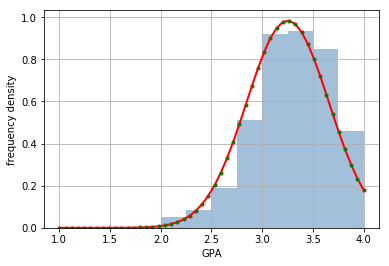

In [4]:
# calculate GPA
gpas = [train_datas[i].GPA for i in range((len(train_datas)-1))]
AverageGPA = np.mean(gpas)
print("averageOfGPA: %f"%AverageGPA)
stdGPA = np.std(gpas,ddof=1)
print("stdOfGPA: %f"%stdGPA)

plt.hist(gpas, bins=8, density=1, alpha=0.5, histtype='stepfilled',color='steelblue', edgecolor='none')
x  = np.linspace(1,4)
y =  np.exp(-(x-AverageGPA)**2/(2*stdGPA**2))/(np.sqrt(2*np.pi)*stdGPA)
plt.plot(x,y,'ro-',x,y,'g*',linewidth=2,markersize = 3)
plt.xlabel('GPA')
plt.ylabel('frequency density')
plt.grid()
plt.show()

In [5]:
## prob GPA 
### using laplacian correction

# the top 10% of students' GPA is above 3.75
gpaTop = 0
for i in range(len(train_datas)-1):
    if train_datas[i].GPA >= 3.75:
        gpaTop+=1
print('gpa top students : %d'%gpaTop)

gpaNotTop = 0
for i in range(len(train_datas)-1):
    if train_datas[i].GPA < (3.75):
        gpaNotTop+=1
print('gpa not top students: %d'%gpaNotTop)


def prob_gpa(gpaState):
    if gpaState == 'top':
        return (gpaTop+1)/(len(train_datas)-1+2)
    if gpaState == 'normal':
        return (gpaNotTop+1)/(len(train_datas)-1+2)
print("P(top)=%f"%prob_gpa('top'))
print("P(normal)=%f"%prob_gpa('normal'))

gpa top students : 27
gpa not top students: 208
P(top)=0.118143
P(normal)=0.881857


In [6]:
## Gender 1 = male, 0 = female
def gpa_and_Gender(gpa,gender):
    value = 0
    if gpa == 'top':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA >= 3.75 and train_datas[i].Gender == gender :
                value+=1
    if gpa == 'normal':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA < 3.75 and train_datas[i].Gender == gender :
                value+=1
    return value

def prob_GenderGivenGPA(gender,gpaState):
    if gpaState == 'top':
        return (gpa_and_Gender(gpaState,gender)+1)/(gpaTop+2)
    if gpaState == 'normal':
        return (gpa_and_Gender(gpaState,gender)+1)/(gpaNotTop+2)

print("P(female|top)=%f"%prob_GenderGivenGPA('0','top'))
print("P(female|normal)=%f"%prob_GenderGivenGPA('0','normal'))
print("P(male|top)=%f"%prob_GenderGivenGPA('1','top'))
print("P(male|normal)=%f"%prob_GenderGivenGPA('1','normal'))

P(female|top)=0.689655
P(female|normal)=0.585714
P(male|top)=0.310345
P(male|normal)=0.409524


In [7]:
## ClassYear
def gpa_and_ClassYear(gpa,year):
    value = 0
    if gpa == 'top':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA >= 3.75 and train_datas[i].ClassYear == year :
                value+=1
    if gpa == 'normal':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA < 3.75 and train_datas[i].ClassYear == year :
                value+=1
    return value

def prob_ClassYearGivenGPA(ClassYear,gpaState):
    if gpaState == 'top':
        return (gpa_and_ClassYear(gpaState,ClassYear)+1)/(gpaTop+4)
    if gpaState == 'normal':
        return (gpa_and_ClassYear(gpaState,ClassYear)+1)/(gpaNotTop+4)
    
print("P(1st|top)=%f"%prob_ClassYearGivenGPA(1,'top'))
print("P(1st|normal)=%f"%prob_ClassYearGivenGPA(1,'normal'))
print("P(2ed|top)=%f"%prob_ClassYearGivenGPA(2,'top'))
print("P(2ed|normal)=%f"%prob_ClassYearGivenGPA(2,'normal'))
print("P(3rd|top)=%f"%prob_ClassYearGivenGPA(3,'top'))
print("P(3rd|normal)=%f"%prob_ClassYearGivenGPA(3,'normal'))
print("P(4th|top)=%f"%prob_ClassYearGivenGPA(4,'top'))
print("P(4th|normal)=%f"%prob_ClassYearGivenGPA(4,'normal'))

P(1st|top)=0.580645
P(1st|normal)=0.141509
P(2ed|top)=0.096774
P(2ed|normal)=0.400943
P(3rd|top)=0.129032
P(3rd|normal)=0.235849
P(4th|top)=0.193548
P(4th|normal)=0.221698


In [8]:
## LarkOwl
def gpa_and_LarkOwl(gpa,LarkOwl):
    value = 0
    if gpa == 'top':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA >= 3.75 and train_datas[i].LarkOwl == LarkOwl :
                value+=1
    if gpa == 'normal':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA < 3.75 and train_datas[i].LarkOwl == LarkOwl :
                value+=1
    return value

def prob_LarkOwlGivenGPA(LarkOwl,gpaState):
    if gpaState == 'top':
        return (gpa_and_LarkOwl(gpaState,LarkOwl)+1)/(gpaTop+3)
    if gpaState == 'normal':
        return (gpa_and_LarkOwl(gpaState,LarkOwl)+1)/(gpaNotTop+3)
    
print("P(Lark|top)=%f"%prob_LarkOwlGivenGPA('Lark','top'))
print("P(Lark|normal)=%f"%prob_LarkOwlGivenGPA('Lark','normal'))
print("P(Owl|top)=%f"%prob_LarkOwlGivenGPA('Owl','top'))
print("P(Owl|normal)=%f"%prob_LarkOwlGivenGPA('Owl','normal'))
print("P(Neither|top)=%f"%prob_LarkOwlGivenGPA('Neither','top'))
print("P(Neither|normal)=%f"%prob_LarkOwlGivenGPA('Neither','normal')) 

P(Lark|top)=0.233333
P(Lark|normal)=0.170616
P(Owl|top)=0.166667
P(Owl|normal)=0.194313
P(Neither|top)=0.600000
P(Neither|normal)=0.635071


In [9]:
## NumEarlyClass
def gpa_and_NumEarlyClass(gpa,NumEarlyClass):
    value = 0
    if gpa == 'top':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA >= 3.75 and train_datas[i].NumEarlyClass == NumEarlyClass :
                value+=1
    if gpa == 'normal':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA < 3.75 and train_datas[i].NumEarlyClass == NumEarlyClass :
                value+=1
    return value

def prob_NumEarlyClassGivenGPA(NumEarlyClass,gpaState):
    if gpaState == 'top':
        return (gpa_and_NumEarlyClass(gpaState,NumEarlyClass)+1)/(gpaTop+6)
    if gpaState == 'normal':
        return (gpa_and_NumEarlyClass(gpaState,NumEarlyClass)+1)/(gpaNotTop+6)

print(prob_NumEarlyClassGivenGPA(0,'top'))
print(prob_NumEarlyClassGivenGPA(0,'normal'))
print(prob_NumEarlyClassGivenGPA(1,'top'))
print(prob_NumEarlyClassGivenGPA(1,'normal'))
print(prob_NumEarlyClassGivenGPA(2,'top'))
print(prob_NumEarlyClassGivenGPA(2,'normal'))
print(prob_NumEarlyClassGivenGPA(3,'top'))
print(prob_NumEarlyClassGivenGPA(3,'normal'))
print(prob_NumEarlyClassGivenGPA(4,'top'))
print(prob_NumEarlyClassGivenGPA(4,'normal'))
print(prob_NumEarlyClassGivenGPA(5,'top'))
print(prob_NumEarlyClassGivenGPA(5,'normal'))

0.2727272727272727
0.3411214953271028
0.12121212121212122
0.056074766355140186
0.24242424242424243
0.34579439252336447
0.15151515151515152
0.13551401869158877
0.09090909090909091
0.04672897196261682
0.12121212121212122
0.07476635514018691


In [10]:
## DepressionStatus
def gpa_and_DepressionStatus(gpa,state):
    value = 0
    if gpa == 'top':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA >= 3.75 and train_datas[i].DepressionStatus == state :
                value+=1
    if gpa == 'normal':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA < 3.75 and train_datas[i].DepressionStatus == state :
                value+=1      
    return value
def prob_DepressionStatusGivenGPA(DepressionStatus,gpaState):
    if gpaState == 'top':
        return (gpa_and_DepressionStatus(gpaState,DepressionStatus)+1)/(gpaTop+3)
    if gpaState == 'normal':
        return (gpa_and_DepressionStatus(gpaState,DepressionStatus)+1)/(gpaNotTop+3)
    
print("P(normalDepression|top)=%f"%prob_DepressionStatusGivenGPA('normal','top'))
print("P(normalDepression|normal)=%f"%prob_DepressionStatusGivenGPA('normal','normal'))
print("P(moderateDepression|top)=%f"%prob_DepressionStatusGivenGPA('moderate','top'))
print("P(moderateDepression|normal)=%f"%prob_DepressionStatusGivenGPA('moderate','normal'))
print("P(severeDepression|top)=%f"%prob_DepressionStatusGivenGPA('severe','top'))
print("P(severeDepression|normal)=%f"%prob_DepressionStatusGivenGPA('severe','normal'))

P(normalDepression|top)=0.666667
P(normalDepression|normal)=0.834123
P(moderateDepression|top)=0.266667
P(moderateDepression|normal)=0.123223
P(severeDepression|top)=0.066667
P(severeDepression|normal)=0.042654


In [11]:
## AnxietyStatus
def gpa_and_AnxietyStatus(gpa,state):
    value = 0
    if gpa == 'top':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA >= 3.75 and train_datas[i].AnxietyStatus == state :
                value+=1
    if gpa == 'normal':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA < 3.75 and train_datas[i].AnxietyStatus == state :
                value+=1      
    return value

def prob_AnxietyStatusGivenGPA(AnxietyStatus,gpaState):
    if gpaState == 'top':
        return (gpa_and_AnxietyStatus(gpaState,AnxietyStatus)+1)/(gpaTop+3)
    if gpaState == 'normal':
        return (gpa_and_AnxietyStatus(gpaState,AnxietyStatus)+1)/(gpaNotTop+3)
    
print(prob_AnxietyStatusGivenGPA('normal','top'))
print(prob_AnxietyStatusGivenGPA('normal','normal'))
print(prob_AnxietyStatusGivenGPA('moderate','top'))
print(prob_AnxietyStatusGivenGPA('moderate','normal'))
print(prob_AnxietyStatusGivenGPA('severe','top'))
print(prob_AnxietyStatusGivenGPA('severe','normal'))

0.7
0.6872037914691943
0.2
0.24170616113744076
0.1
0.07109004739336493


In [12]:
## Stress
def gpa_and_Stress(gpa,state):
    value = 0
    if gpa == 'top':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA >= 3.75 and train_datas[i].Stress == state :
                value+=1
    if gpa == 'normal':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA < 3.75 and train_datas[i].Stress == state :
                value+=1      
    return value

def prob_StressGivenGPA(Stress,gpaState):
    if gpaState == 'top':
        return (gpa_and_Stress(gpaState,Stress)+1)/(gpaTop+2)
    if gpaState == 'normal':
        return (gpa_and_Stress(gpaState,Stress)+1)/(gpaNotTop+2)
    
print("P(normalStress|top)=%f"%prob_StressGivenGPA('normal','top'))
print("P(normalStress|normal)=%f"%prob_StressGivenGPA('normal','normal'))
print("P(highStress|top)=%f"%prob_StressGivenGPA('high','top'))
print("P(highStress|normal)=%f"%prob_StressGivenGPA('high','normal'))

P(normalStress|top)=0.689655
P(normalStress|normal)=0.776190
P(highStress|top)=0.310345
P(highStress|normal)=0.223810


In [13]:
## AlcoholUse
def gpaTop_and_AlcoholUse(gpa,state):
    value = 0
    if gpa == 'top':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA >= 3.75 and train_datas[i].AlcoholUse == state :
                value+=1
    if gpa == 'normal':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA < 3.75 and train_datas[i].AlcoholUse == state :
                value+=1        
    return value

def prob_AlcoholUseGivenGPA(AlcoholUse,gpaState):
    if gpaState == 'top':
        return (gpaTop_and_AlcoholUse(gpaState,AlcoholUse)+1)/(gpaTop+4)
    if gpaState == 'normal':
        return (gpaTop_and_AlcoholUse(gpaState,AlcoholUse)+1)/(gpaNotTop+4)
    
print("P(Abstain|top)=%f"%prob_AlcoholUseGivenGPA('Abstain','top'))
print("P(Abstain|normal)=%f"%prob_AlcoholUseGivenGPA('Abstain','normal'))
print("P(Light|top)=%f"%prob_AlcoholUseGivenGPA('Light','top'))
print("P(Light|normal)=%f"%prob_AlcoholUseGivenGPA('Light','normal'))
print("P(Moderate|top)=%f"%prob_AlcoholUseGivenGPA('Moderate','top'))
print("P(Moderate|normal)=%f"%prob_AlcoholUseGivenGPA('Moderate','normal'))
print("P(Heavy|top)=%f"%prob_AlcoholUseGivenGPA('Heavy','top'))
print("P(Heavy|normal)=%f"%prob_AlcoholUseGivenGPA('Heavy','normal'))

P(Abstain|top)=0.193548
P(Abstain|normal)=0.132075
P(Light|top)=0.354839
P(Light|normal)=0.330189
P(Moderate|top)=0.354839
P(Moderate|normal)=0.466981
P(Heavy|top)=0.096774
P(Heavy|normal)=0.070755


averageOfWeekdaySleepOfGpaTop: 7.774074
stdOWeekdaySleepOfGpaTop: 1.138140
AverageSleepOfGpaNormal: 7.844327
stdSleepOfGpaNormal: 1.190709


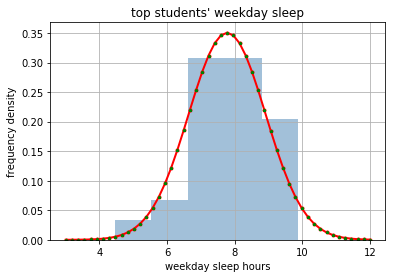

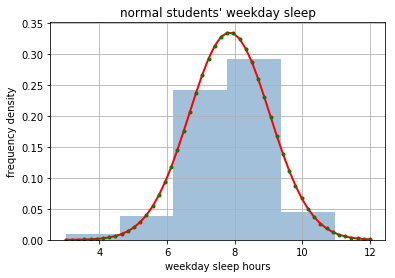

P(7.9|top):0.348382
P(7.9|normal):0.334680


In [14]:
## WeekdaySleep
WeekdaySleepOfGpaTop = [train_datas[i].WeekdaySleep for i in range((len(train_datas)-1)) if train_datas[i].GPA >= (3.75)]
AverageSleepOfGpaTop = np.mean(WeekdaySleepOfGpaTop)
print("averageOfWeekdaySleepOfGpaTop: %f"%AverageSleepOfGpaTop)
stdSleepOfGpaTop = np.std(WeekdaySleepOfGpaTop,ddof=1)
print("stdOWeekdaySleepOfGpaTop: %f"%stdSleepOfGpaTop)
WeekdaySleepOfGpaNormal = [train_datas[i].WeekdaySleep for i in range((len(train_datas)-1)) if train_datas[i].GPA < (3.75)]
AverageSleepOfGpaNormal = np.mean(WeekdaySleepOfGpaNormal)
print("AverageSleepOfGpaNormal: %f"%AverageSleepOfGpaNormal)
stdSleepOfGpaNormal = np.std(WeekdaySleepOfGpaNormal,ddof=1)
print("stdSleepOfGpaNormal: %f"%stdSleepOfGpaNormal)

plt.hist(WeekdaySleepOfGpaTop, bins=5, density=1, alpha=0.5, histtype='stepfilled',color='steelblue', edgecolor='none')
x  = np.linspace(3,12)
y =  np.exp(-(x-AverageSleepOfGpaTop)**2/(2*stdSleepOfGpaTop**2))/(np.sqrt(2*np.pi)*stdSleepOfGpaTop)
plt.plot(x,y,'ro-',x,y,'g*',linewidth=2,markersize = 3)
plt.xlabel('weekday sleep hours')
plt.ylabel('frequency density')
plt.title('top students\' weekday sleep')
plt.grid()
plt.show()

plt.figure()
plt.hist(WeekdaySleepOfGpaNormal, bins=5, density=1, alpha=0.5, histtype='stepfilled',color='steelblue', edgecolor='none')
x  = np.linspace(3,12)
y =  np.exp(-(x-AverageSleepOfGpaNormal)**2/(2*stdSleepOfGpaNormal**2))/(np.sqrt(2*np.pi)*stdSleepOfGpaNormal)
plt.plot(x,y,'ro-',x,y,'g*',linewidth=2,markersize = 3)
plt.xlabel('weekday sleep hours')
plt.ylabel('frequency density')
plt.title('normal students\' weekday sleep')
plt.grid()
plt.show()

def porb_sleepTogpa(sleep,average,std):
    return (1/(np.sqrt(2*np.pi*std*std)))* np.exp(-(sleep-average)**2/(2*std**2))
def prob_sleepGivenGPA(sleep,gpa):
    if gpa == 'top':
        return porb_sleepTogpa(sleep,AverageSleepOfGpaTop,stdSleepOfGpaTop)
    if gpa == 'normal':
        return porb_sleepTogpa(sleep,AverageSleepOfGpaNormal,stdSleepOfGpaNormal)

print("P(7.9|top):%f"%prob_sleepGivenGPA(7.9,'top'))
print("P(7.9|normal):%f"%prob_sleepGivenGPA(7.9,'normal'))

In [15]:
## AllNighter
def gpa_and_AllNighter(gpa,n):
    value = 0
    if gpa == 'top':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA >= 3.75 and train_datas[i].AllNighter == n :
                value+=1
    if gpa == 'normal':
        for i in range(len(train_datas)-1):
            if train_datas[i].GPA < 3.75 and train_datas[i].AllNighter == n :
                value+=1        
    return value

def prob_AllNighterGivenGPA(AllNighter,gpaState):
    if gpaState == 'top':
        return (gpa_and_AllNighter(gpaState,AllNighter)+1)/(gpaTop+2)
    if gpaState == 'normal':
        return (gpa_and_AllNighter(gpaState,AllNighter)+1)/(gpaNotTop+2)
    
print(prob_AllNighterGivenGPA(0,'top'))
print(prob_AllNighterGivenGPA(0,'normal'))
print(prob_AllNighterGivenGPA(1,'top'))
print(prob_AllNighterGivenGPA(1,'normal'))

0.8620689655172413
0.8666666666666667
0.13793103448275862
0.13333333333333333


In [16]:
# considering all the factors above, select Gender,ClassYear,LarkOwl,DepressionStatus,
# Stress,AlcoholUse,WeekdaySleep to make decision
corrects = 0
times = 0
for i in range(len(test_datas)-1):
    test = test_datas[i]
    p1 = prob_gpa('top')*prob_GenderGivenGPA(test.Gender,'top')*prob_ClassYearGivenGPA(test.ClassYear,'top')*prob_LarkOwlGivenGPA(test.LarkOwl,'top')*prob_DepressionStatusGivenGPA(test.DepressionStatus,'top')*prob_StressGivenGPA(test.Stress,'top')*prob_AlcoholUseGivenGPA(test.AlcoholUse,'top')*prob_sleepGivenGPA(test.WeekdaySleep,'top')
    p2 = prob_gpa('normal')*prob_GenderGivenGPA(test.Gender,'normal')*prob_ClassYearGivenGPA(test.ClassYear,'normal')*prob_LarkOwlGivenGPA(test.LarkOwl,'normal')*prob_DepressionStatusGivenGPA(test.DepressionStatus,'normal')*prob_StressGivenGPA(test.Stress,'normal')*prob_AlcoholUseGivenGPA(test.AlcoholUse,'normal')*prob_sleepGivenGPA(test.WeekdaySleep,'normal')
    times+=1
    if (p1 > p2 and test.GPA >= 3.75) or (p1<p2 and test.GPA < (3.75)):
        corrects+=1
print("Correct times of testing %d, total testing times %d."%(corrects,times))
print("Correct rate of testing is %f."%(corrects/times))


Correct times of testing 15, total testing times 15.
Correct rate of testing is 1.000000.


In [17]:
## total testing
corrects = 0
times = 0
for i in range(len(datas)-1):
    test = datas[i]
    p1 = prob_gpa('top')*prob_GenderGivenGPA(test.Gender,'top')*prob_ClassYearGivenGPA(test.ClassYear,'top')*prob_LarkOwlGivenGPA(test.LarkOwl,'top')*prob_DepressionStatusGivenGPA(test.DepressionStatus,'top')*prob_StressGivenGPA(test.Stress,'top')*prob_AlcoholUseGivenGPA(test.AlcoholUse,'top')*prob_sleepGivenGPA(test.WeekdaySleep,'top')
    p2 = prob_gpa('normal')*prob_GenderGivenGPA(test.Gender,'normal')*prob_ClassYearGivenGPA(test.ClassYear,'normal')*prob_LarkOwlGivenGPA(test.LarkOwl,'normal')*prob_DepressionStatusGivenGPA(test.DepressionStatus,'normal')*prob_StressGivenGPA(test.Stress,'normal')*prob_AlcoholUseGivenGPA(test.AlcoholUse,'normal')*prob_sleepGivenGPA(test.WeekdaySleep,'normal')
    times+=1
    if (p1 > p2 and test.GPA >= 3.75) or (p1<p2 and test.GPA < (3.75)):
        corrects+=1
print("Correct times of testing %d, total testing times %d."%(corrects,times))
print("Correct rate of testing is %f."%(corrects/times))
print("The normal student percentage:%f."%(gpaNotTop/len(datas)))

Correct times of testing 225, total testing times 252.
Correct rate of testing is 0.892857.
The normal student percentage:0.822134.
